Importing python libraries

In [6]:
from scipy.io import loadmat
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
from keras.utils import to_categorical
import matplotlib.pyplot as plt




Loading mnist data with labels as an array

In [7]:
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

Plotting the loaded data

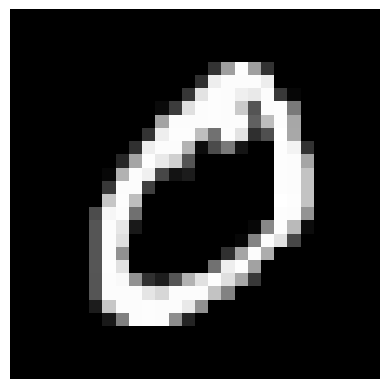

The label of image is 0.0


In [8]:
# Reshape the input image into a 2D array (28x28)
index_image=0
image_2d = mnist_data[index_image].reshape(28, 28)
# Plot the image
plt.imshow(image_2d, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis
plt.show()
print("The label of image is",mnist_label[index_image])

Splitting the dataset into the test and train dataset for training the model

In [9]:
# Reshape the data into 28x28 images and normalize the pixel values to range [0, 1]
images_data = mnist_data.reshape(-1, 28, 28, 1).astype('float32') / 255.0

mnist_label = to_categorical(mnist_label).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_data, mnist_label, test_size=0.2, random_state=42)




# Determine the input shape dynamically
inputshape = X_train.shape[1:]


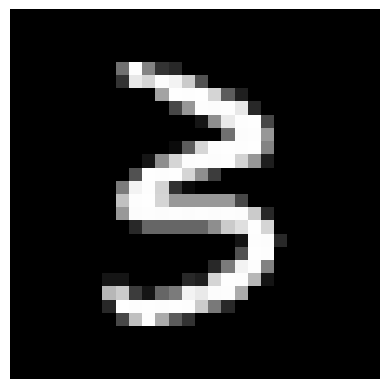

The label of image is [0 0 0 1 0 0 0 0 0 0]


In [10]:
# Reshape the input image into a 2D array (28x28)
index_image=5
image_2d = X_train[index_image].reshape(28, 28)
# Plot the image
plt.imshow(image_2d, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis
plt.show()
print("The label of image is",y_train[index_image])

Defining the model

In [11]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=inputshape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model

In [12]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.8995 - loss: 0.3259 - val_categorical_accuracy: 0.9754 - val_loss: 0.0792
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.9853 - loss: 0.0478 - val_categorical_accuracy: 0.9861 - val_loss: 0.0477
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.9889 - loss: 0.0330 - val_categorical_accuracy: 0.9890 - val_loss: 0.0371
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.9935 - loss: 0.0215 - val_categorical_accuracy: 0.9814 - val_loss: 0.0624
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - categorical_accuracy: 0.9938 - loss: 0.0191 - val_categorical_accuracy: 0.9897 - val_loss: 0.0343
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - categorical_accuracy: 0.9958 - loss: 0.0121 - val_categorical_accuracy: 0.9881 - val_loss: 0.0408
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - categorical_

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9876 - loss: 0.0568
Test Accuracy: 0.9876428842544556


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)